In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
import os

folder_path = '/content/drive/MyDrive/cse-445/Assignment-4/car+evaluation'
for file in os.listdir(folder_path):
    print(file)

car.names
car.data
car.c45-names


In [ ]:
file_path = '/content/drive/MyDrive/cse-445/Assignment-4/car+evaluation/car.data'
column_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df = pd.read_csv(file_path, header=None, names=column_names)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.shape


(1728, 7)

/tmp/ipython-input-24-729556929.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['class'])


<Axes: xlabel='class', ylabel='Density'>

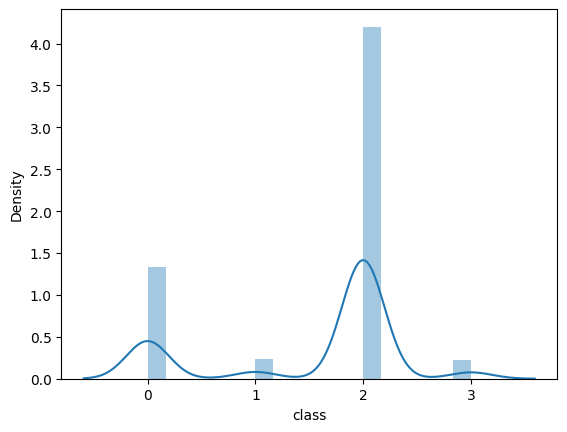

In [ ]:
sns.distplot(df['class'])

In [ ]:
encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])

df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [ ]:
df['class'].nunique()

4

In [ ]:
X = df.drop('class', axis=1)
y = df['class']

In [ ]:
#Train
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
#Test and eval
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp)
print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)

Train: (1209, 6)
Validation: (259, 6)
Test: (260, 6)


In [ ]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_val_pred = classifier.predict(X_val)
accuracy = (y_val_pred == y_val).mean()
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 0.9691


In [ ]:
best_val_accuracy = 0
best_depth = None
for depth in range(2, 11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_accuracy = (y_val_pred == y_val).mean()
    print(f"max_depth={depth}, Validation Accuracy={val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_depth = depth
print(f"\nBest max_depth: {best_depth} with Validation Accuracy: {best_val_accuracy:.4f}")


max_depth=2, Validation Accuracy=0.7606
max_depth=3, Validation Accuracy=0.7761
max_depth=4, Validation Accuracy=0.7954
max_depth=5, Validation Accuracy=0.8456
max_depth=6, Validation Accuracy=0.8726
max_depth=7, Validation Accuracy=0.9151
max_depth=8, Validation Accuracy=0.9421
max_depth=9, Validation Accuracy=0.9575
max_depth=10, Validation Accuracy=0.9575

Best max_depth: 9 with Validation Accuracy: 0.9575


In [ ]:
final_dt = DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)
final_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, random_state=0)

In [ ]:
#prediction on Test Set
y_test_pred = final_dt.predict(X_test)

In [ ]:
accuracy = (y_test_pred == y_test).mean()
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9385


In [ ]:
y_true = y_test.to_numpy()
y_pred = y_test_pred

In [ ]:
#Confusion Matrix
def confusion_matrix_manual(y_true, y_pred):
    classes = np.unique(y_true)
    n_classes = len(classes)
    matrix = np.zeros((n_classes, n_classes), dtype=int)
    for actual, pred in zip(y_true, y_pred):
        matrix[actual][pred] += 1
    return matrix
cm = confusion_matrix_manual(y_true, y_pred)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[ 52   4   2   0]
 [  4   6   0   0]
 [  4   0 178   0]
 [  1   1   0   8]]


In [ ]:
def calculate_metrics(cm):
    n_classes = cm.shape[0]
    precision_list = []
    recall_list = []
    f1_list = []
    for i in range(n_classes):
        TP = cm[i, i]
        FP = cm[:, i].sum() - TP
        FN = cm[i, :].sum() - TP
        precision = TP / (TP + FP) if (TP + FP) > 0 else 0
        recall = TP / (TP + FN) if (TP + FN) > 0 else 0
        f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        print(f"Class {i}: Precision={precision:.4f}, Recall={recall:.4f}, F1-Score={f1:.4f}")
    avg_precision = sum(precision_list) / n_classes
    avg_recall = sum(recall_list) / n_classes
    avg_f1 = sum(f1_list) / n_classes
    print(f"\nAverage Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1-Score: {avg_f1:.4f}")
    return avg_precision, avg_recall, avg_f1

avg_precision, avg_recall, avg_f1 = calculate_metrics(cm)

Class 0: Precision=0.8525, Recall=0.8966, F1-Score=0.8739
Class 1: Precision=0.5455, Recall=0.6000, F1-Score=0.5714
Class 2: Precision=0.9889, Recall=0.9780, F1-Score=0.9834
Class 3: Precision=1.0000, Recall=0.8000, F1-Score=0.8889

Average Precision: 0.8467
Average Recall: 0.8186
Average F1-Score: 0.8294


In [ ]:
!pip install xgboost


In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0)
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:53:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_val_pred_xgb = xgb_model.predict(X_val)
val_accuracy_xgb = (y_val_pred_xgb == y_val).mean()
print(f"XGBoost Validation Accuracy: {val_accuracy_xgb:.4f}")

XGBoost Validation Accuracy: 0.9884


In [ ]:
best_val_accuracy = 0
best_depth = None
for depth in range(2, 11):
    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',
                          max_depth=depth, random_state=0)
    model.fit(X_train, y_train)
    y_val_pred = model.predict(X_val)
    val_accuracy = (y_val_pred == y_val).mean()
    print(f"max_depth={depth}, Validation Accuracy={val_accuracy:.4f}")
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_depth = depth
print(f"\nBest max_depth: {best_depth} with Validation Accuracy: {best_val_accuracy:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


max_depth=2, Validation Accuracy=0.9537
max_depth=3, Validation Accuracy=0.9768
max_depth=4, Validation Accuracy=0.9846


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


max_depth=5, Validation Accuracy=0.9884
max_depth=6, Validation Accuracy=0.9884
max_depth=7, Validation Accuracy=0.9846


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:55:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


max_depth=8, Validation Accuracy=0.9884
max_depth=9, Validation Accuracy=0.9884
max_depth=10, Validation Accuracy=0.9884

Best max_depth: 5 with Validation Accuracy: 0.9884


Best depth found is 5 so we will train with that

In [ ]:
final_xgb = XGBClassifier(max_depth=5, eval_metric='mlogloss', random_state=0)
final_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_test_pred_xgb = final_xgb.predict(X_test)
accuracy_xgb = (y_test_pred_xgb == y_test).mean()
print(f"XGBoost Test Accuracy: {accuracy_xgb:.4f}")

XGBoost Test Accuracy: 0.9885


In [ ]:
cm_xgb = confusion_matrix_manual(y_test.to_numpy(), y_test_pred_xgb)
print("XGBoost Confusion Matrix:")
print(cm_xgb)

XGBoost Confusion Matrix:
[[ 58   0   0   0]
 [  1   9   0   0]
 [  2   0 180   0]
 [  0   0   0  10]]


In [ ]:
#Calling Precision function defined in previous cell
avg_precision_xgb, avg_recall_xgb, avg_f1_xgb = calculate_metrics(cm_xgb)

Class 0: Precision=0.9508, Recall=1.0000, F1-Score=0.9748
Class 1: Precision=1.0000, Recall=0.9000, F1-Score=0.9474
Class 2: Precision=1.0000, Recall=0.9890, F1-Score=0.9945
Class 3: Precision=1.0000, Recall=1.0000, F1-Score=1.0000

Average Precision: 0.9877
Average Recall: 0.9723
Average F1-Score: 0.9792


In [ ]:
y_test_probs_dt = final_dt.predict_proba(X_test)
y_test_probs_xgb = final_xgb.predict_proba(X_test)
from sklearn.preprocessing import label_binarize
y_test_onehot = label_binarize(y_test, classes=[0,1,2,3])

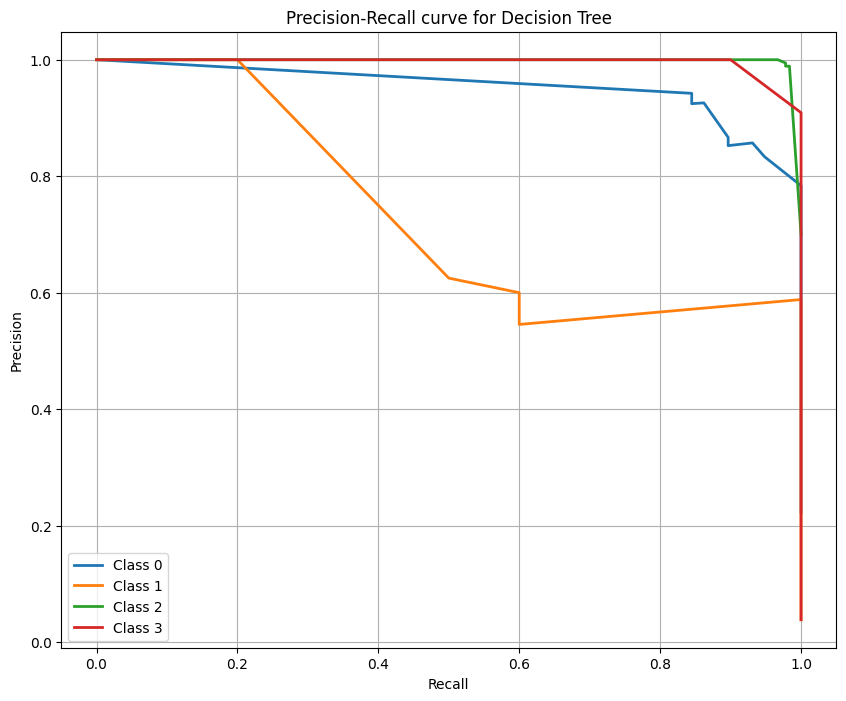

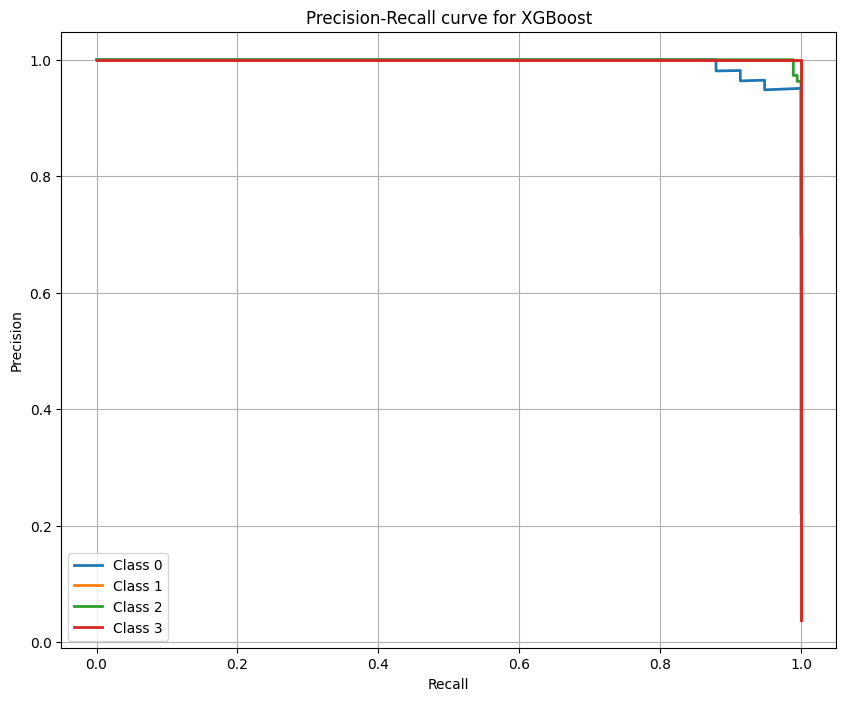

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

def plot_pr_curves(y_true_onehot, y_probs, model_name):
    n_classes = y_true_onehot.shape[1]
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        precision, recall, _ = precision_recall_curve(y_true_onehot[:, i], y_probs[:, i])
        plt.plot(recall, precision, lw=2, label=f'Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall curve for {model_name}')
    plt.legend()
    plt.grid()
    plt.show()

# Plot for Decision Tree
plot_pr_curves(y_test_onehot, y_test_probs_dt, "Decision Tree")

# Plot for XGBoost
plot_pr_curves(y_test_onehot, y_test_probs_xgb, "XGBoost")


In [ ]:
save_folder = '/content/drive/MyDrive/cse-445/Assignment-4/Results'

In [ ]:
cm_df_dt = pd.DataFrame(cm, columns=[f'Pred_{i}' for i in range(cm.shape[0])], index=[f'Actual_{i}' for i in range(cm.shape[0])])
cm_df_dt.to_csv(os.path.join(save_folder, 'confusion_matrix_decision_tree.csv'))
cm_df_xgb = pd.DataFrame(cm_xgb, columns=[f'Pred_{i}' for i in range(cm_xgb.shape[0])], index=[f'Actual_{i}' for i in range(cm_xgb.shape[0])])
cm_df_xgb.to_csv(os.path.join(save_folder, 'confusion_matrix_xgboost.csv'))
avg_precision_dt, avg_recall_dt, avg_f1_dt = calculate_metrics(cm)


Class 0: Precision=0.8525, Recall=0.8966, F1-Score=0.8739
Class 1: Precision=0.5455, Recall=0.6000, F1-Score=0.5714
Class 2: Precision=0.9889, Recall=0.9780, F1-Score=0.9834
Class 3: Precision=1.0000, Recall=0.8000, F1-Score=0.8889

Average Precision: 0.8467
Average Recall: 0.8186
Average F1-Score: 0.8294


In [ ]:
metrics_dict = {
    'Model': ['Decision Tree', 'XGBoost'],
    'Accuracy': [accuracy_dt, accuracy_xgb],
    'Average Precision': [avg_precision_dt, avg_precision_xgb],
    'Average Recall': [avg_recall_dt, avg_recall_xgb],
    'Average F1-Score': [avg_f1_dt, avg_f1_xgb]
}

metrics_df = pd.DataFrame(metrics_dict)
metrics_df.to_csv(os.path.join(save_folder, 'evaluation_metrics.csv'), index=False)
print("Evaluation metrics saved successfully!")

Evaluation metrics saved successfully!
